In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from skimage.io import imread
from skimage import restoration
import skimage.util
from skimage.restoration import rolling_ball
import spam.DIC

In [2]:
# Directory
site_data_dir = '/mxn/groups/kits/scisw/jupyterhub/data-for-validations/tomography/spam/PSI_2015/Conical_constriction/Originals_8bit'

# Select Data
names = ['rec010']

In [3]:
# Load data
##
# binvalue = 4
binvalue = 40

##
ims = []
for name in names:
    file = sorted(glob(site_data_dir + "/" + name + ".tif"))[0]
    ims.append(np.asarray(spam.DIC.binning(imread(file), binvalue)))
    shape = ims[-1].shape
    dtype = ims[-1].dtype
    print(shape, dtype)

(45, 50, 50) uint8


In [4]:
# Remove background
image_inverted = skimage.util.invert(ims[0])
# background_inverted = restoration.rolling_ball(image_inverted, radius=100)
background_inverted = restoration.rolling_ball(image_inverted, radius=10)
background = skimage.util.invert(background_inverted)
corrected_image = skimage.util.invert(image_inverted - background_inverted)

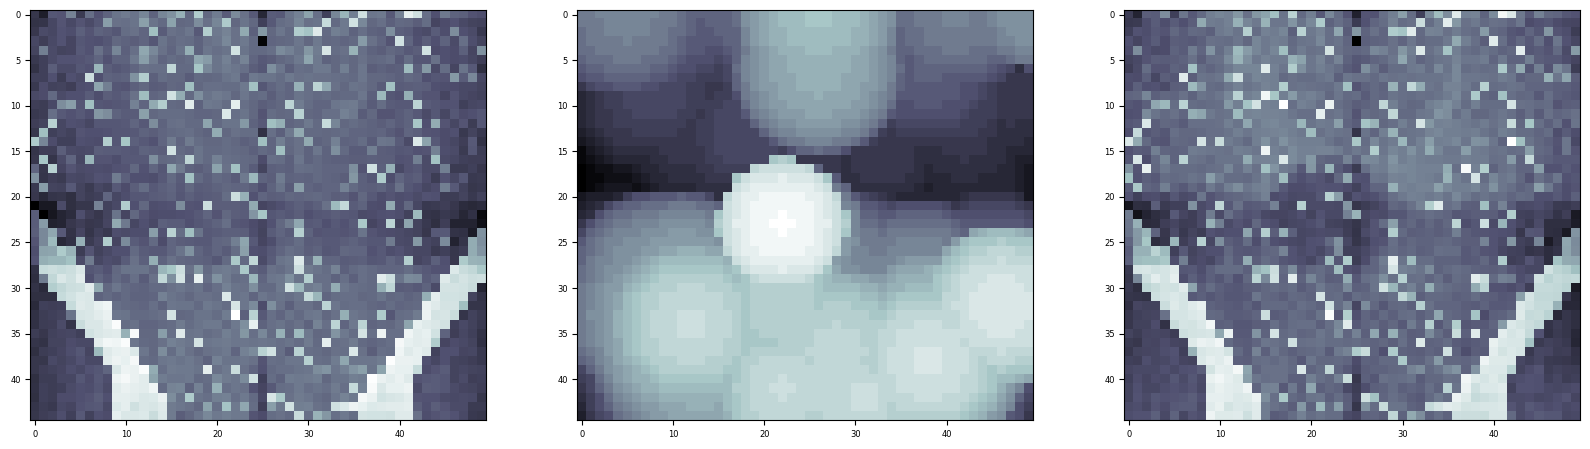

In [5]:
# Plot original, background and corrected images
(ZZ, XX, YY) = ims[0].shape; xmid = XX//2
fig, C = plt.subplots(1, 3, figsize = (20, 20))
C[0].imshow(ims[0][:,xmid,:], cmap='bone')
C[1].imshow(background[:,xmid,:], cmap='bone')
C[2].imshow(corrected_image[:,xmid,:], cmap='bone')